# Tabula Muris

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import re
import scIB
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
relevant_tissues = {'Bladder', 'Brain', 'Kidney', 'Liver', 'Lung', 'Mammary',
 'Marrow', 'Muscle', 'Pancreas', 'Spleen', 'Thymus'}
len(relevant_tissues)

11

## Read Files

In [3]:
raw_data_dir = "/home/icb/subarna.palit/projects/data/MCA DGE Data/merged/merge_all_TM/"
data_dir = "/storage/groups/ml01/workspace/group.daniela/tm/"

In [4]:
droplet = sc.read(raw_data_dir+"TM_droplet_tissues_merged_dge.h5", cache=True)
facs = sc.read(raw_data_dir+"TM_facs_tissues_merged_dge.h5", cache=True)

In [5]:
droplet_anno = pd.read_csv(raw_data_dir+"TM_droplet_tissues_merged_labels.csv", sep=",|\|")
facs_anno = pd.read_csv(raw_data_dir+"TM_facs_tissues_merged_labels.csv", sep=",|\|")

/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
droplet_anno = droplet_anno.reset_index().iloc[:,1:]
facs_anno = facs_anno.reset_index().iloc[:,1:]

In [13]:
droplet_anno.columns = ['cell_type', 'method', 'tissue']
facs_anno.columns = ['cell_type', 'method', 'tissue']

droplet_anno.index = droplet.obs.index
facs_anno.index = facs.obs.index

In [8]:
droplet.obs = pd.concat([droplet.obs, droplet_anno], axis=1)

In [14]:
facs.obs = pd.concat([facs.obs, facs_anno], axis=1)

In [15]:
facs.obs.index = [i[0] for i in facs.obs.index.str.split('-')]

In [16]:
droplet.obs.index = [i[0] for i in droplet.obs.index.str.split('-')]

In [20]:
facs_anno[facs_anno["tissue"] == "Spleen"]["cell_type"].unique()

array([nan], dtype=object)

In [25]:
facs_anno["tissue"].unique()

array(['Aorta', 'Bladder', 'Brain', 'Colon', 'Diaphragm', 'Fat', 'Heart',
       'Kidney', 'Liver', 'Lung', 'Mammary', 'Marrow', 'Muscle',
       'Pancreas', 'Skin', 'Spleen', 'Thymus', 'Tongue', 'Trachea'],
      dtype=object)

In [ ]:
facs.obs["tissue"].unique()

In [23]:
droplet.obs["tissue"].unique()

array(['Bladder', 'Heart', 'Kidney', 'Liver', 'Lung', 'Mammary', 'Marrow',
       'Muscle', 'Spleen', 'Thymus', 'Tongue', 'Trachea'], dtype=object)

## QC

In [16]:
plt.rcParams['figure.figsize'] = 8,8

In [17]:
scIB.preprocessing.summarize_counts(droplet)
scIB.preprocessing.summarize_counts(facs)

Bladder


Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


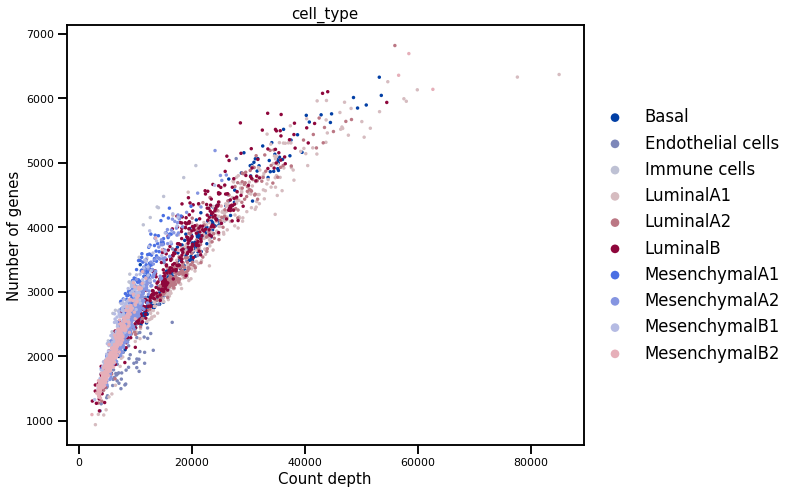

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


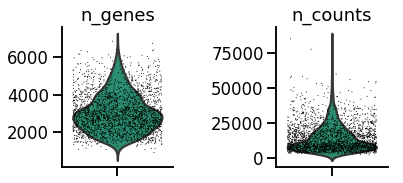

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Kidney


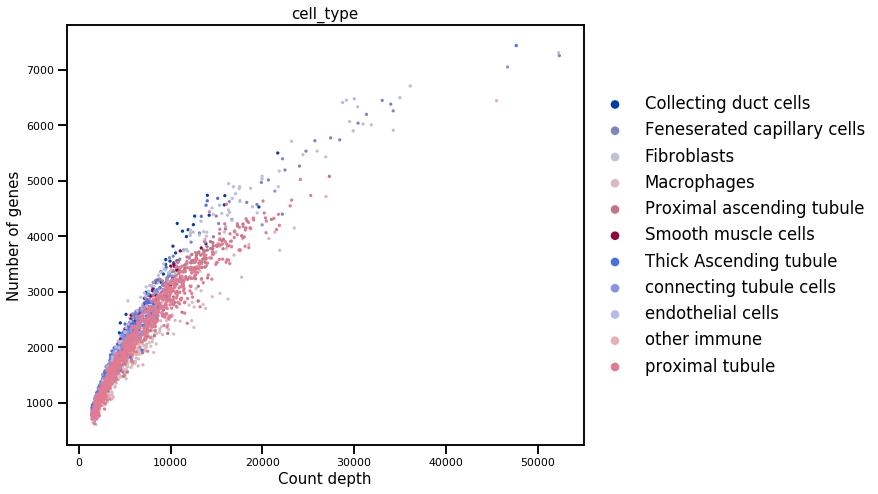

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


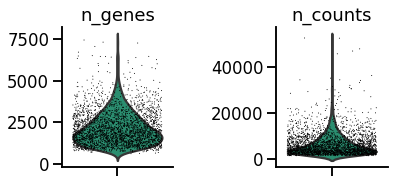

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Liver


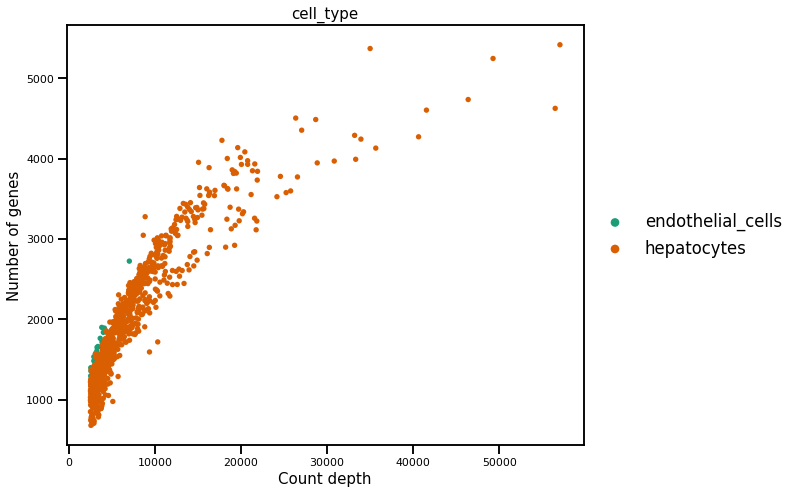

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


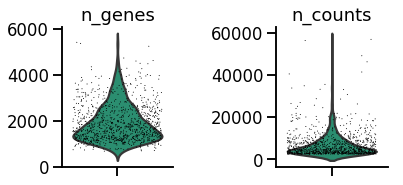

Lung


Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


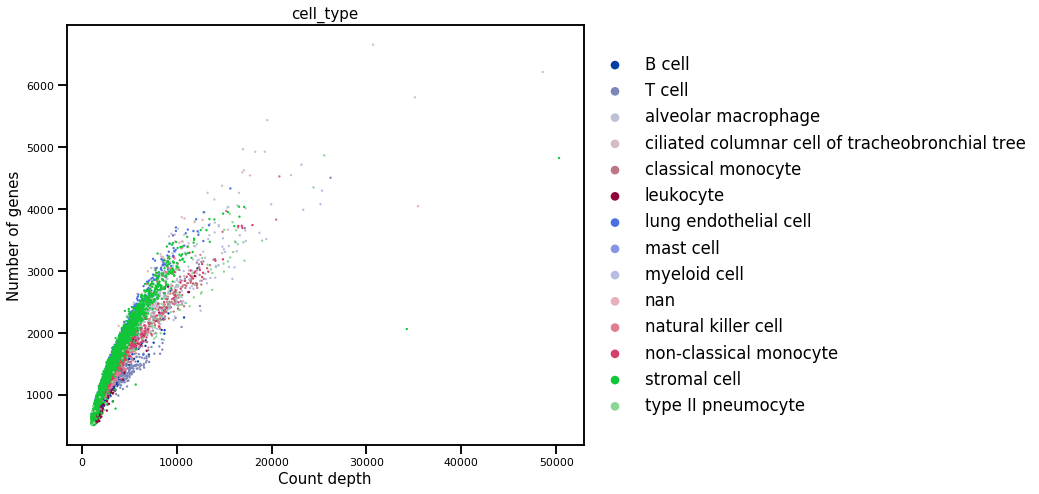

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


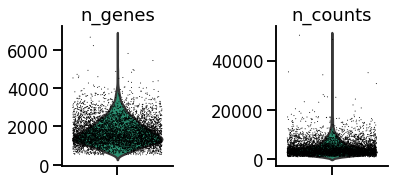

Mammary


Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


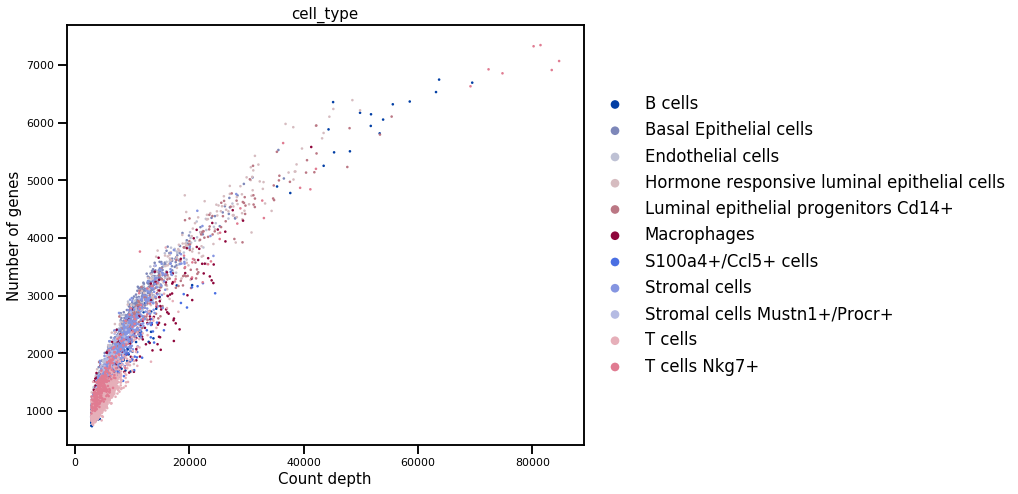

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


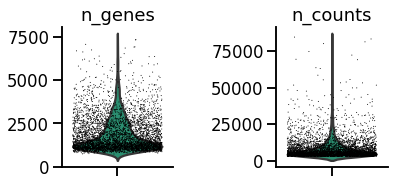

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.


Marrow


... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


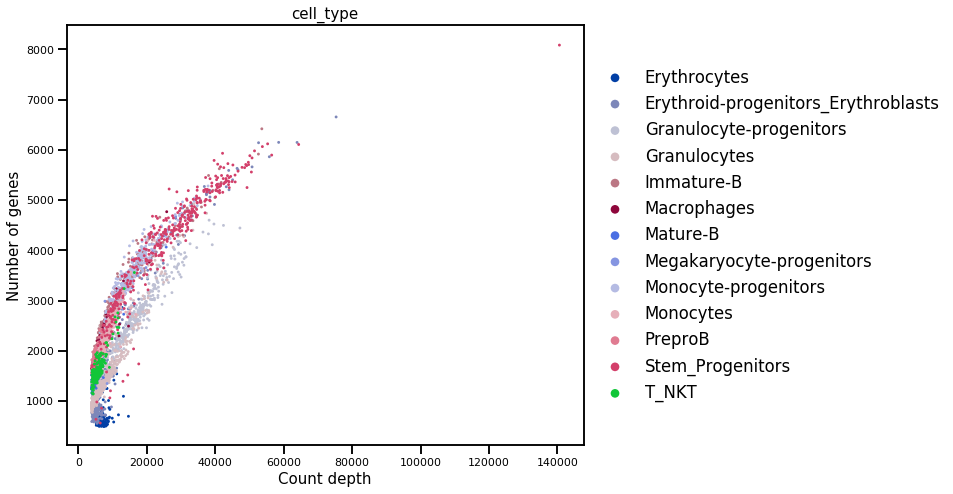

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


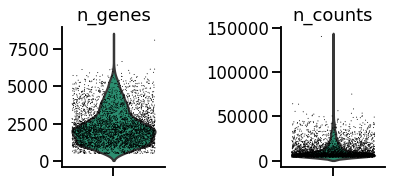

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.


Muscle


... storing 'tissue' as categorical


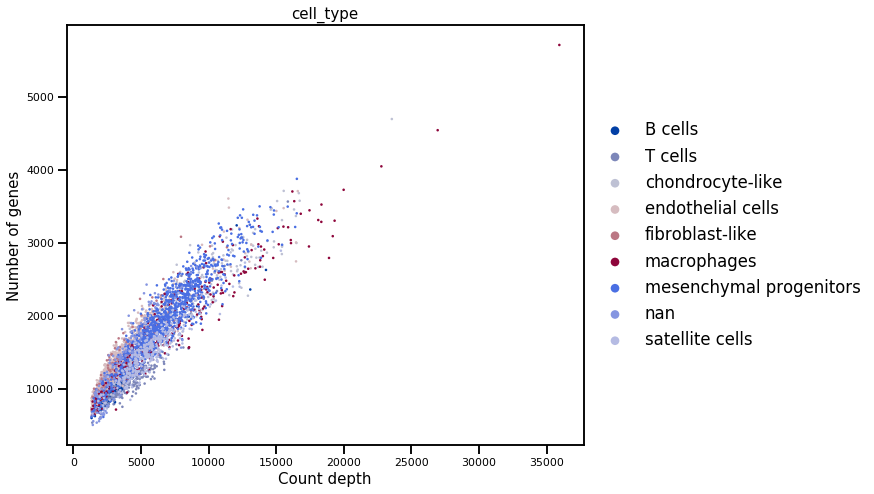

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


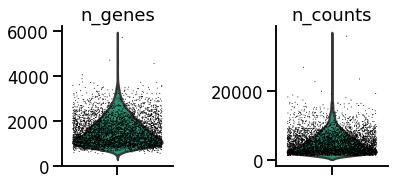

Spleen


Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


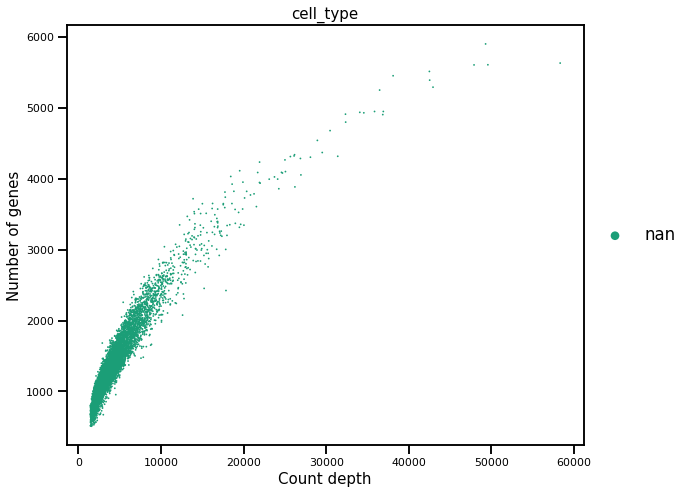

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


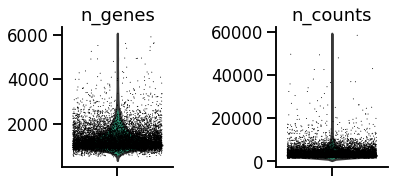

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Thymus


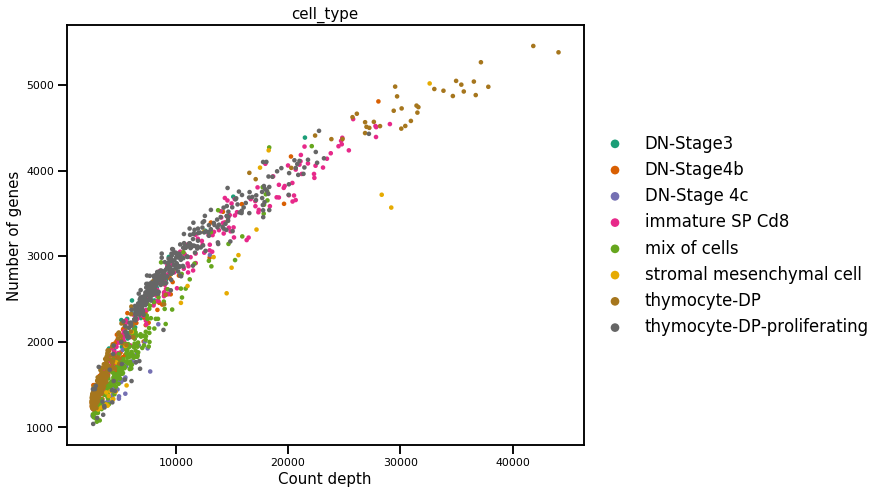

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


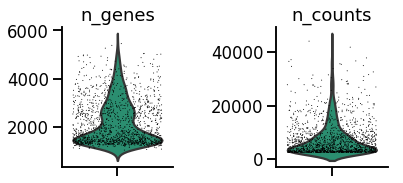

In [21]:
for tissue in droplet.obs['tissue'].unique():
    if tissue not in relevant_tissues:
        continue
    print(tissue)
    scIB.preprocessing.plot_QC(droplet[droplet.obs["tissue"] == tissue], color="cell_type")
    sc.pl.violin(droplet[droplet.obs["tissue"] == tissue], keys=['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.


Bladder


... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


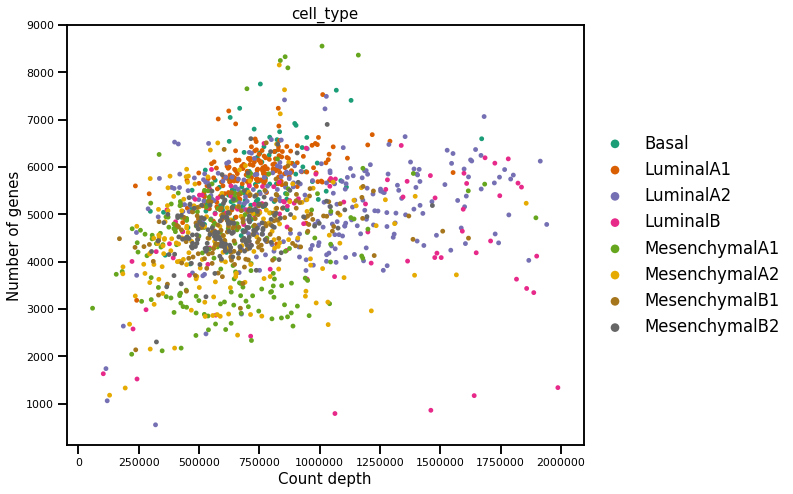

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


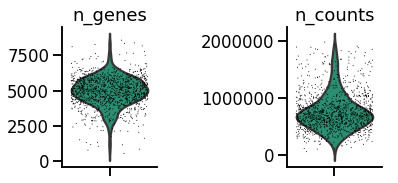

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.


Brain


... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


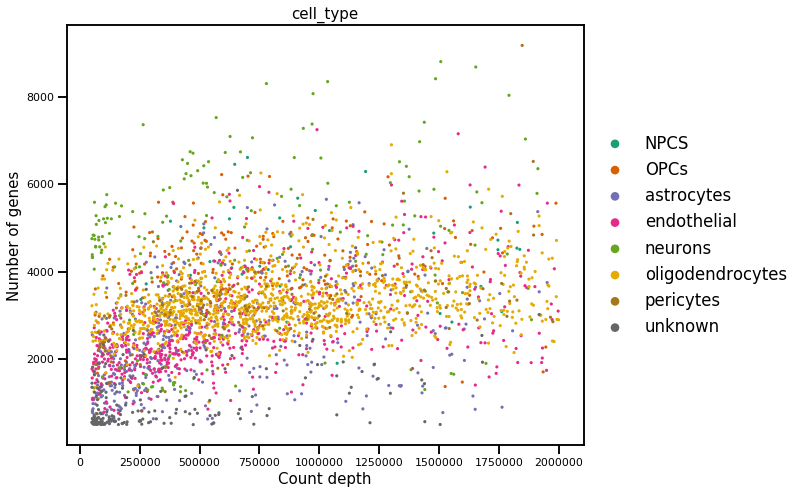

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


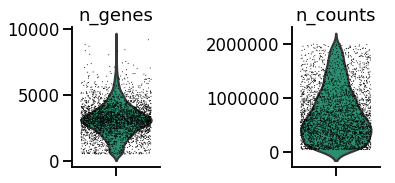

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Kidney


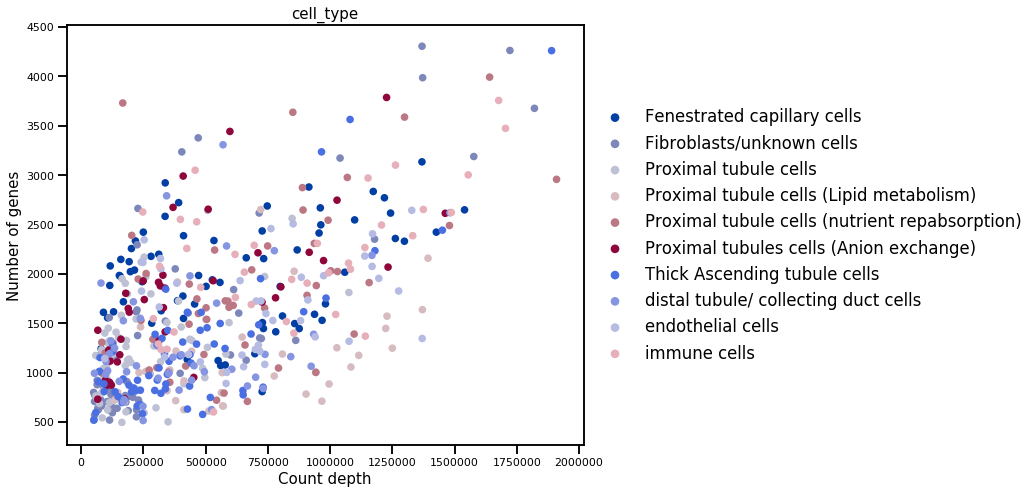

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


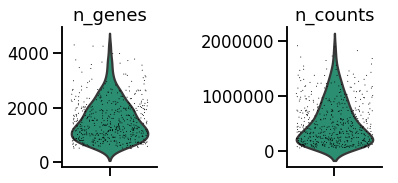

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Liver


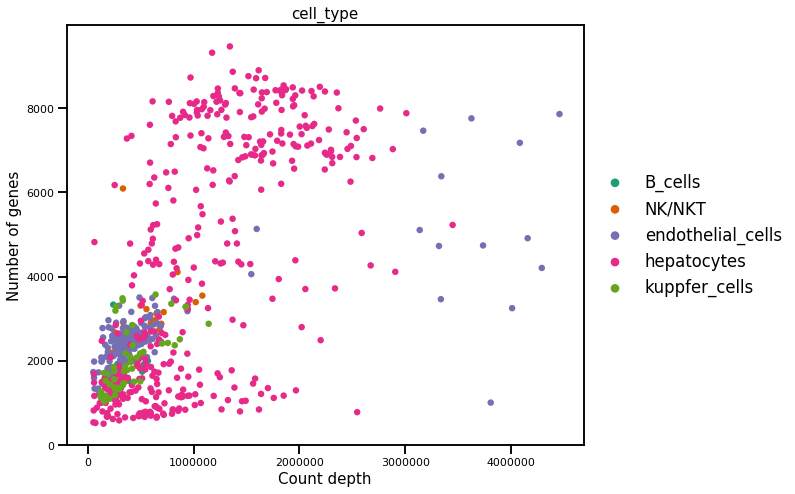

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


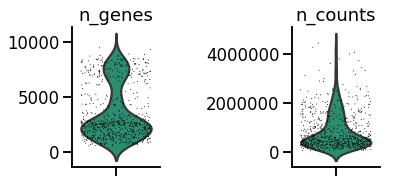

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.


Lung


... storing 'tissue' as categorical


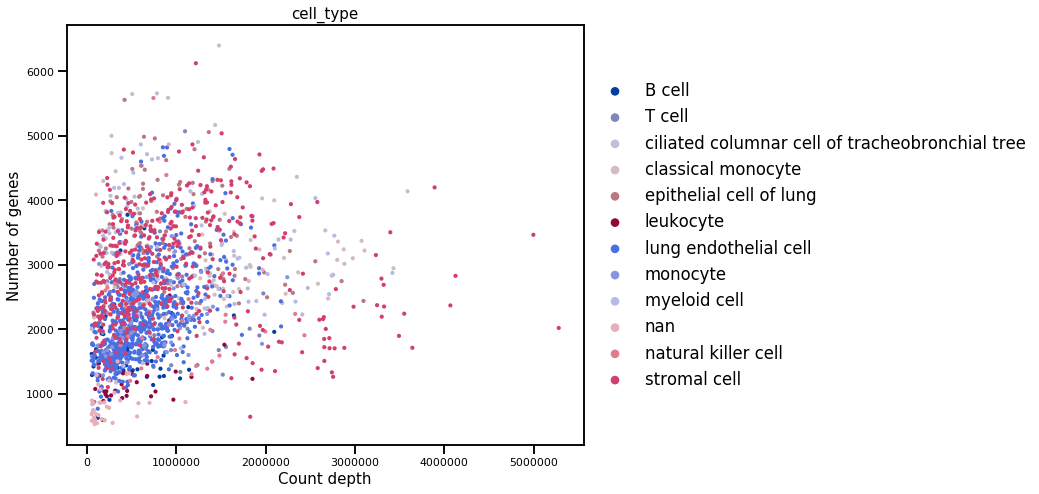

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


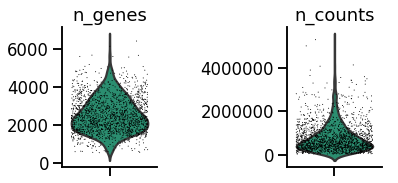

Mammary


Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


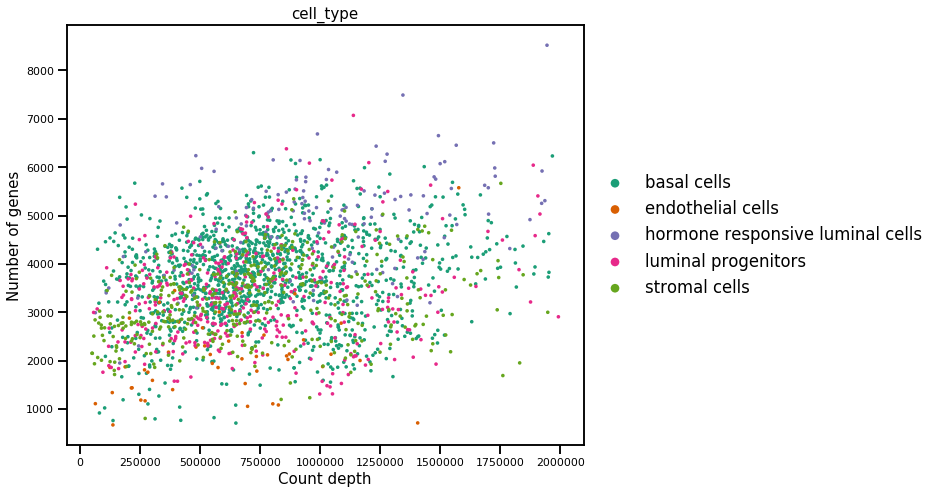

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


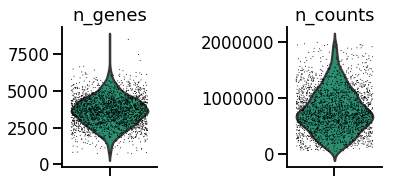

Marrow


Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


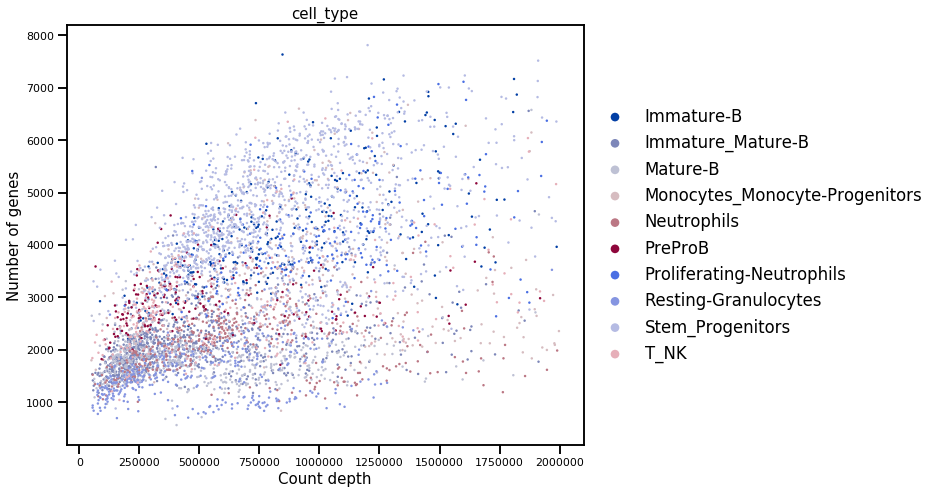

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


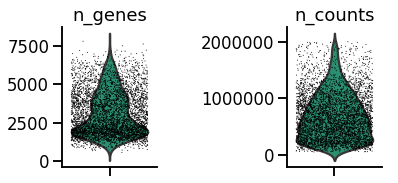

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Muscle


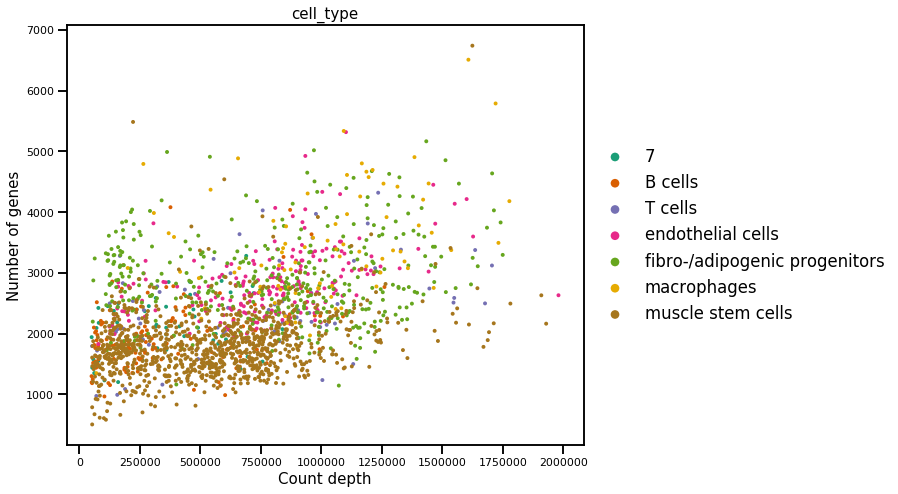

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


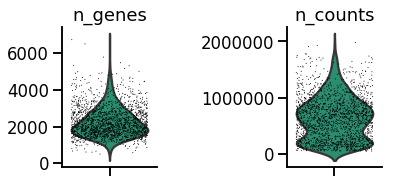

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Pancreas


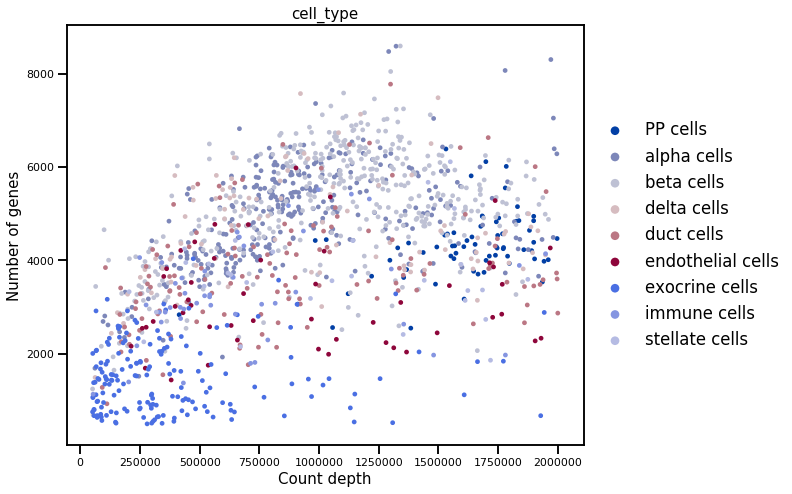

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


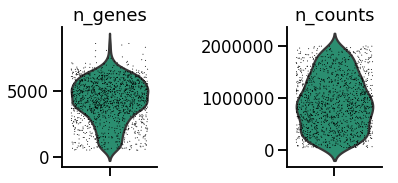

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Spleen


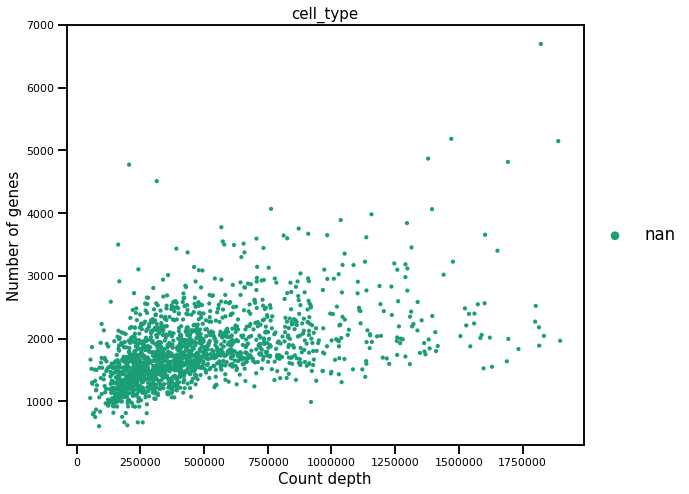

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


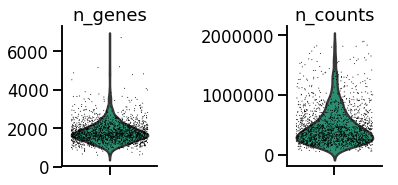

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


Thymus


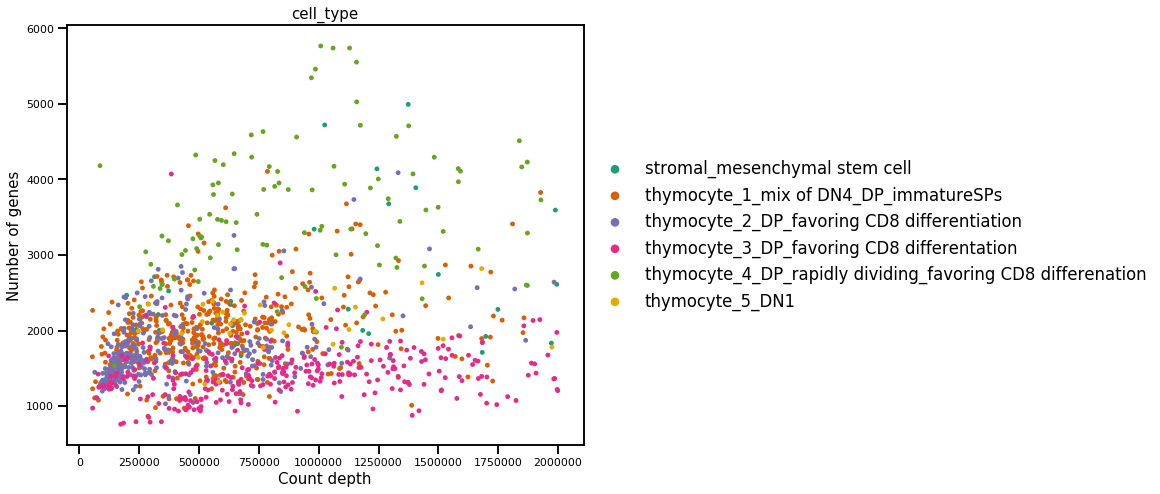

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical


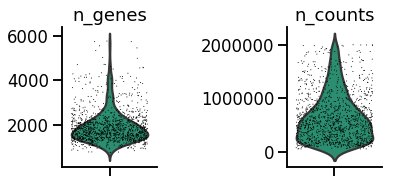

In [22]:
for tissue in facs.obs['tissue'].unique():
    if tissue not in relevant_tissues:
        continue
    print(tissue)
    scIB.preprocessing.plot_QC(facs[facs.obs["tissue"] == tissue], color="cell_type")
    sc.pl.violin(facs[facs.obs["tissue"] == tissue], keys=['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)

In [31]:
facs[facs.obs["tissue"] == "Spleen"]

View of AnnData object with n_obs × n_vars = 1689 × 23341 
    obs: 'batch', 'cell_type', 'method', 'tissue', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'

In [28]:
def splitTissue(adata, folder, name):
    for tissue in adata.obs["tissue"].unique():
        if tissue not in relevant_tissues:
            continue
        sc.write(folder+name+tissue+".h5ad", adata[adata.obs.tissue==tissue])

In [30]:
splitTissue(droplet, "/storage/groups/ml01/workspace/group.daniela/tm/droplet/", "raw_")

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as

In [31]:
splitTissue(facs, "/storage/groups/ml01/workspace/group.daniela/tm/facs/", "raw_")

Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'method' as

In [39]:
facs.obs["tissue"].value_counts()

Marrow       4897
Fat          4709
Heart        4585
Colon        3459
Brain        3000
Mammary      2304
Skin         2263
Muscle       1937
Lung         1716
Spleen       1689
Tongue       1394
Pancreas     1327
Bladder      1287
Thymus       1283
Diaphragm     870
Trachea       846
Liver         710
Kidney        517
Aorta         364
Name: tissue, dtype: int64